## **1. Download Dataset and Unzip**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Flowers-Dataset.zip'


Archive:  /content/drive/MyDrive/Colab Notebooks/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy

## **2. Image Agumentation**

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/flowers"

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)
x_train = train_datagen.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4317 images belonging to 5 classes.


In [5]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("vertical",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

### **3. Creating a Model**

In [6]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()
training_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=57,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [7]:
validation_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=107,image_size=(img_height, img_width),batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [19]:
training_ds.class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

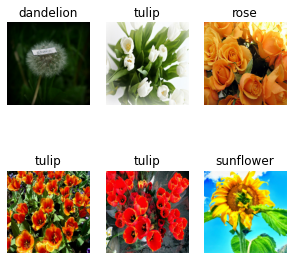

In [20]:
plt.figure(figsize=(5, 5))
for data, labels in training_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(data[i].numpy().astype("uint8"))
    plt.title(training_ds.class_names[labels[i]])
    plt.axis("off")

## **4.Add Layers**
  **a) Convolution layer**

  **b) Maxpooling layer** 

  **c) Flatten**

  **d) Hidden/dense layers**
  
  **e) Output layer**

In [ ]:
'''a) Convolution layer'''

model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))


'''b) Maxpooling layer'''

model.add(MaxPooling2D(pool_size = (2,2)))

'''c) Flatten'''

model.add(Flatten())


'''d) Hidden/dense layers'''

model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu"))


'''e) Output layer'''

model.add(Dense(5, activation = "softmax"))

## **5. Compiling Model**

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## **6.Fit the Model**

In [27]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))


Epoch 1/15
44/44 [==============================] - 30s 653ms/step - loss: 1.5876 - accuracy: 0.3639
Epoch 2/15
44/44 [==============================] - 29s 652ms/step - loss: 1.1550 - accuracy: 0.5214
Epoch 3/15
44/44 [==============================] - 29s 653ms/step - loss: 1.0697 - accuracy: 0.5724
Epoch 4/15
44/44 [==============================] - 29s 654ms/step - loss: 1.0181 - accuracy: 0.5974
Epoch 5/15
44/44 [==============================] - 29s 657ms/step - loss: 0.9625 - accuracy: 0.6250
Epoch 6/15
44/44 [==============================] - 29s 654ms/step - loss: 0.9746 - accuracy: 0.6115
Epoch 7/15
44/44 [==============================] - 38s 868ms/step - loss: 0.8897 - accuracy: 0.6491
Epoch 8/15
44/44 [==============================] - 30s 679ms/step - loss: 0.8702 - accuracy: 0.6595
Epoch 9/15
44/44 [==============================] - 29s 654ms/step - loss: 0.8586 - accuracy: 0.6662
Epoch 10/15
44/44 [==============================] - 30s 668ms/step - loss: 0.8304 - accura

## **7. Save The Model**

In [28]:
model.save("flowers.h1")


## **8. Test the Model**

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("/content/flowers.h1")
daisy_img = image.load_img('/content/flowers/daisy/100080576_f52e8ee070_n.jpg',target_size=(64,64))
x = image.img_to_array(daisy_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(predicted_class)]

'daisy'

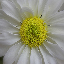

In [41]:
m=daisy_img
m